# Taller número cuatro, Metodos computacionales. 
Juan Sebastian Pabon Martínez - 202215602

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
from tqdm import tqdm
import scipy.integrate as integrate
from scipy.stats import norm 
from scipy.stats import cauchy

#Metodos de conteo 
ejercicios : 20,22,23


Para probar teoricamente la afirmación usamos la formula de combinatoria con repetición: 

$$\binom{n+k-1}{k}=\binom{12}{10}= 66$$


Por otro lado, Para pobrar computancionalmente la afirmación simplemente es necesario hacer ciclos anidados que te permitan recorrer los valores de nuestreo(Teniendo en cuanta quese encuyen desde el 0 hasta el 10) y saber si la suba da 10 se guarda como un caso confirmado

In [ ]:
#22

contador = 0
for i in range(11):
    for j in range(11):
        for k in range(11):
            if i + j + k == 10:
                contador += 1

print(contador)

66


#Generales probabilidad 
ejercicios: 4,9,12

la probabilidad que dentro de un grupo de 365 personas todas tengo cumpleaños distintos es del 1.4549552156187023e-155 %


Text(0.5, 1.0, 'Probabilidad de cumpleaños distintos')

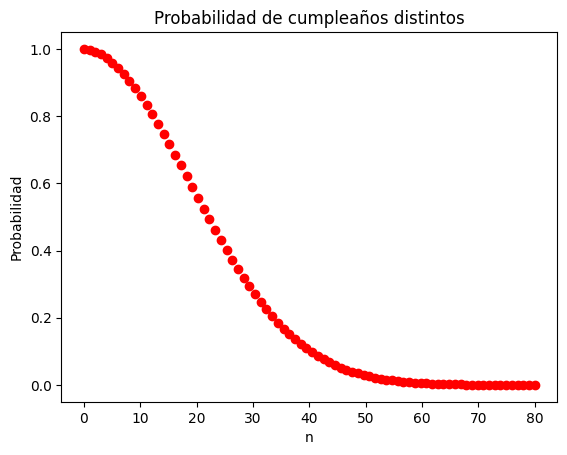

In [ ]:
#4
dias = 365
inicial = 365
total=[]
for i in range(365):
  u=inicial-i
  prob= u/dias
  total.append(prob)

probabilidad = (np.prod(total))*100
print("la probabilidad que dentro de un grupo de 365 personas todas tengo cumpleaños distintos es del {} %".format(probabilidad))

muestra = []
pro=[]
x= np.linspace(0,80,num=80)
for i in range(len(x)):
  u=inicial-i
  prob= u/dias
  muestra.append(prob)
  probability= np.prod(muestra)
  pro.append(probability)

plt.scatter(x,pro,color='r')
plt.xlabel('n')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de cumpleaños distintos')



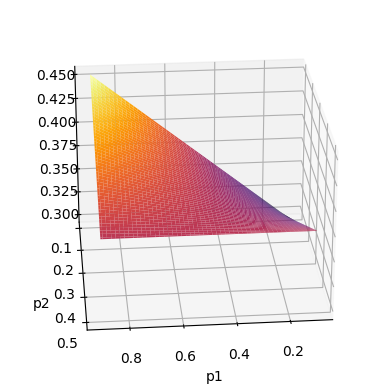

In [ ]:

#9
def Probabilidad (p1,p2):
   p_1= (p1)*(p2)*(0.5)*(0.5)
   p_2= (1-p1)*(1-p2)*(0.5)*(0.5)
   p_3= p1*(1-p2)*(0.5)
   p_4= (1-p1)*p2*(0.5)
   return p_1+p_2+p_3+p_4

p1= np.linspace(0.1,0.9,100)
p2 = np.linspace(0.1,0.5,100)
x,y= np.meshgrid(p1,p2)
z= Probabilidad(x,y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z,cmap='inferno')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.view_init(elev=25, azim=85)

#Terminar (maximo y minimo)

In [ ]:
#12


#Distribuciones discretas de probabilidad.
ejercicios : 3,4 

#Distribuciones continuas de probabilidad.
ejercicios : 1,4

a) Para probar que la función de densidad conjunta  es válida. Simplemmente es necesario probar que la función es positiva en el intervalo x,y: 
$$\frac{2}{3}(x+2y)>0$$ 
sin embargo solo es necesario probar que 
$$(x+2y) >0$$
lo cual es verdadero dado que $0\leq x\leq1$ y $0\leq y\leq1$, por lo que la suma siempre sera postiva.

In [ ]:
#b Para la distribución marginal de x simplemente es necesario hacer la integral de la funcion con respecto a y en su intervalo
x, y = sym.symbols('x y')
f = (2/3)*(x+2*y)

gx= sym.integrate(f,(y, 0, 1))
print("La distribución marginal de x es:")
gx

La distribución marginal de x es:


0.666666666666667*x + 0.666666666666667

In [ ]:
#Para la distribución marginal de y simplemente es necesario hacer la integral de la funcion con respecto a x en su intervalo

hy= sym.integrate(f,(x, 0, 1))
print("La distribución marginal de x es:")
hy

La distribución marginal de x es:


1.33333333333333*y + 0.333333333333333

c) la media del valor esperado para x esta dado por la expresión: 

$$\mathbb{E}(x)= \int_0^1 x*g(x) dx$$

In [ ]:
#C
Ex= sym.integrate(gx*x,(x, 0, 1))
print("El valor esperado para x esta dado por: {}".format(Ex))


El valor esperado para x esta dado por: 0.555555555555556


Concuerda con el valor esperado de $\mathbb{E}(x)=\frac{10}{18}$

d) la media del valor esperado para y esta dado por la expresion:
$$\mathbb{E}(x)= \int_0^1 y*h(y) dy$$

In [ ]:
Ey= sym.integrate(hy*y,(y, 0, 1))
print("El valor esperado para x esta dado por: {}".format(Ey))

El valor esperado para x esta dado por: 0.611111111111111


Concuerda con el valor esperado de $\mathbb{E}(y)=\frac{11}{18}$

In [ ]:
#e aplicamos la formula para la convarianza

E_xy=sym.integrate(f*y*x,(y, 0, 1),(x, 0, 1))
Var= E_xy-(Ex*Ey)
print("El valor de la convarianza esta dado por {}".format(Var))

El valor de la convarianza esta dado por -0.00617283950617281


In [ ]:
#f aplicamos la otra expresion para la convariaza

E_xy=sym.integrate(f*(y-Ey)*(x-Ex),(y, 0, 1),(x, 0, 1))
print("El valor de la convarianza esta dado por {}".format(E_xy))


El valor de la convarianza esta dado por -0.00617283950617285


Como podemos ver por ambas ecuaciones se llega al mismo resultado

g) Basados en la convarianza de la probabiidad del modelo poedmoes decir que existe una correración entre ambos terminos ddo que el valor de $\sigma_ {xy}$ no es igual a cero, lo que implica que las variables no son linealmente independientes. 

In [29]:
#4

0.016303559150908233
0.5360136547507937
0.6749809740920956
0.7931992966318848


# Metropolis Hasting.
ejercicios:1,3,4

100%|██████████| 9999/9999 [00:02<00:00, 3858.64it/s]


0.0007575757575757576

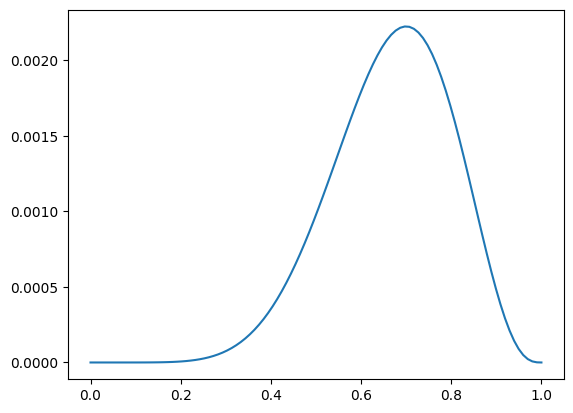

In [34]:

def prior(p):
    return np.piecewise(p,[p>=0 and p<= 1, p<0 and p>1],[lambda p:1,lambda p:0]) #funcion a trozos

prior = np.vectorize(prior)

def likelihood (p,r,n): #likelihood binomial
    return p**r*(1-p)**(n-r)

def Posterior(p,r,n):
    return likelihood(p,r,n)*prior(p)

p= np.linspace(0,1,100)
r=7
n=10
post= Posterior(p,r,n)

plt.plot(p,post)

def metropolis(x0,Posterior,Nstep=int(1e4),delta=0.4): #Utilizamos la funcion de metropolis
    
    x= np.zeros((Nstep,1))
    #Prior
    x[0]= x0
    
    for i in tqdm(range(1,Nstep)):
        P0= Posterior(x[i-1],r,n)
        xf=x[i-1]+delta*2*(np.random.rand()-0.5)
        P1= Posterior(xf,r,n)
        alpha = np.minimum(1,P1/P0)
        g= np.random.rand()
        if alpha > g:
            x[i,0]= xf
        else:
            x[i,:]= x[i-1,:]
            
    
    return x[100:,:]
    
init= np.array([0.2])
MCMC= metropolis(init,Posterior)
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

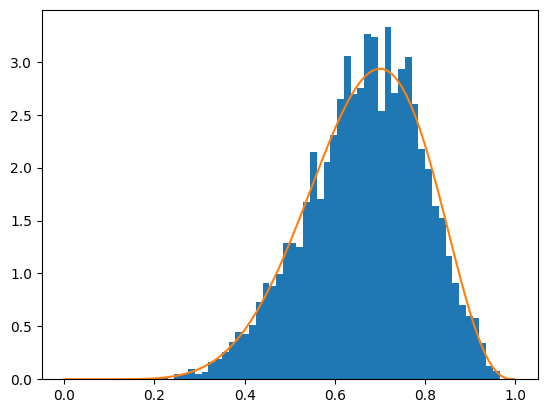

In [27]:
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,post/I)

In [31]:
#Percentil de confianza
var= np.var(MCMC)
print(var)

#limite inferior
limitinf= np.percentile(MCMC,16)
print(limitinf)

#mediana
med= np.percentile(MCMC,50)
print(med)

#limite superior
limitsup= np.percentile (MCMC,84)
print(limitsup)


0.016303559150908233
0.5360136547507937
0.6749809740920956
0.7931992966318848


In [32]:
upperlimit = np.percentile(MCMC,95) #intervalo de confianza 
print(upperlimit)

0.8611535780743581


In [ ]:
#c ¿La moneda esta truncada?

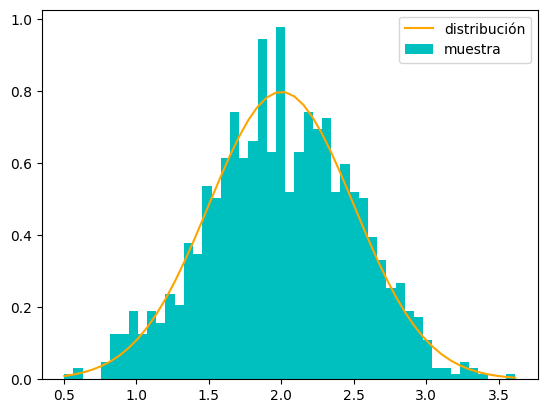

In [69]:
#3 
N=1000
mu=2
sigma=0.5

def GetHisto(Data,bines):
    h, bins = np.histogram(Data,bins=bines)
    w = np.diff(bins)   # Ancho de clase
    m = bins[:-1] + 0.5*w[0] # Marca de clase
    
    hnorm = h/np.sum(h*w)
    return h,hnorm,m,w

normal = norm.rvs(loc=mu, scale=sigma, size=N)
xbins = np.linspace(np.min(normal),np.max(normal),50)
Hb,HNb,mb,w = GetHisto(normal,xbins)

fig, ax = plt.subplots()
ax.bar(mb,HNb, width=w,color="c",label="muestra")
ax.plot(xbins, norm.pdf(xbins,loc=mu,scale=sigma), color='orange',label="distribución")
ax.legend()
plt.show()


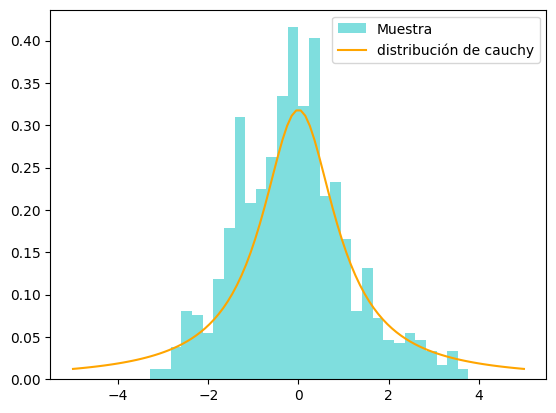

In [70]:
#4
N = 1000
step = 0.4
x = 0
muestras = []

def cauch(x):
  return 1/(np.pi*(1+x**2))

#Generamos los puntos aleatorios de muestreo y llevamos a cabo el proceso de selección

for i in range(N):
    x1 = x + np.random.normal(0, step)
    valido = min(1, cauch(x1) / cauch(x)) 
    if np.random.rand() < valido:
        x = x1
    muestras.append(x)


x= np.linspace(-5,5,100)
y= cauchy.pdf(x,0,1)

fig, ax = plt.subplots()
ax.hist(muestras, bins=30, density=True, alpha=0.5, label='Muestra',color='c')
ax.plot(x, y, color='orange',label="distribución de cauchy")
ax.legend()
plt.show()



#Parameter estimation.
ejercicios: 3,5